In [56]:
import fooof as f
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import scipy.signal as scs

SEGMENT3_FILENAME = "segment3.mat"


def load_data(filename):
    """
    Loads a single matrix from a given .mat file
    :param filename: The full path to the .mat file to load
    :return: np.array with the saved matrix in the .mat file
    """
    return scio.loadmat(filename)['data']

## A

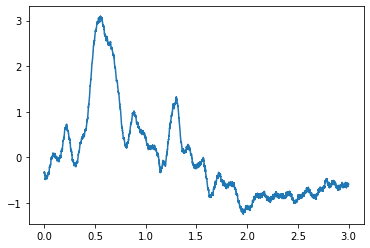

In [57]:
FS = 500
seg3 = np.squeeze(load_data(SEGMENT3_FILENAME))
plt.plot(np.linspace(0, 3, 15000), seg3)

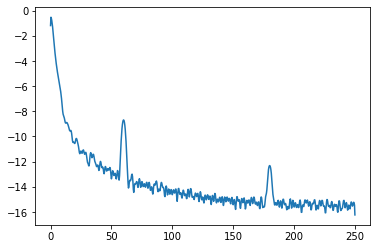

In [58]:
seg3 = scs.resample(seg3, 3 * FS)
freqs, psd = scs.welch(seg3, FS, "hamming", nperseg=250, detrend=False, nfft=int(3 * FS))
psd = np.squeeze(psd)  # required to remove redundant axis
plt.plot(freqs, np.log(psd))

## B

In [59]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12])
fooof.add_data(freqs, psd, freq_range=[2, 50])
fooof.fit()

#### i

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.5775, 3.8498                                          
                                                                                                  
                                       8 peaks were found:                                        
          

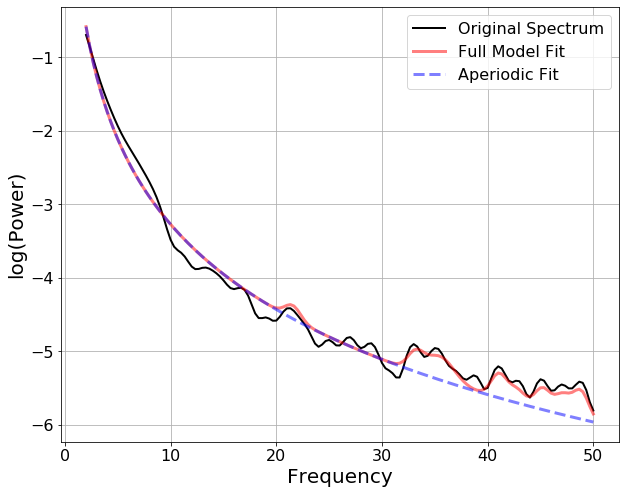

In [60]:
fooof.report()  # plots and prints the fit statistics

#### ii - it seems to detect 5 oscillatory components. however their peaks are very low, suggesting they are overfitted as oscillations.
#### We can pick a different threshold or change the range of frequencies to a larger one to detect the oscillations.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 2 - 200 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.8073, 2.6940                                          
                                                                                                  
                                       2 peaks were found:                                        
          

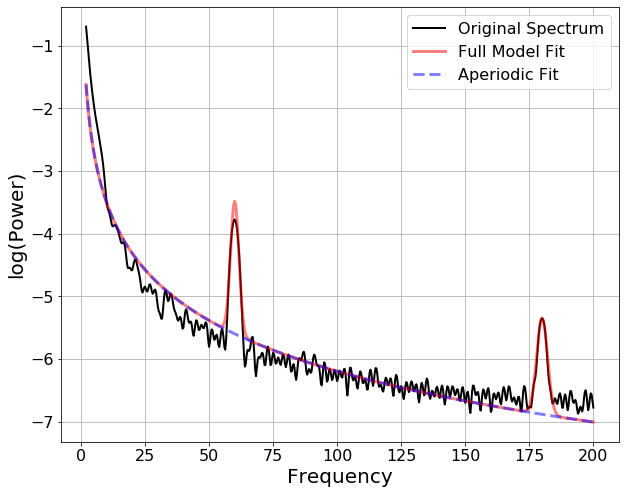

In [61]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12], peak_threshold=4)
fooof.add_data(freqs, psd, freq_range=[2, 200])
fooof.fit()
fooof.report()

## C
#### i

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.3568, 3.6115                                          
                                                                                                  
                                       0 peaks were found:                                        
          

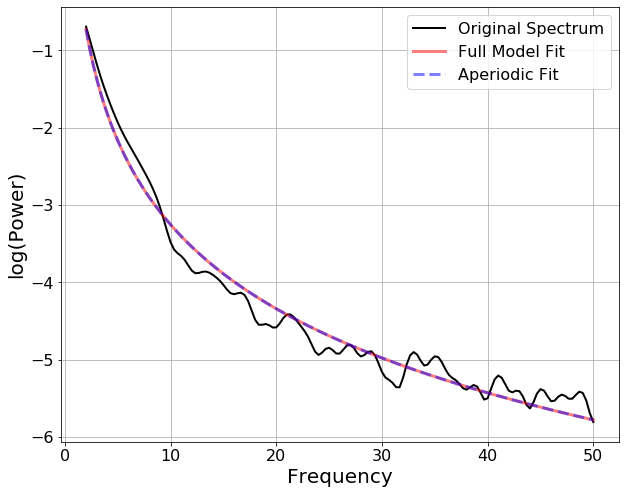

In [62]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12], peak_threshold=3)
fooof.add_data(freqs, psd, freq_range=[2, 50])
fooof.fit()
fooof.report()

#### 3 - no overfit at all! only 1/f

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.0735, 3.4257                                          
                                                                                                  
                                       13 peaks were found:                                       
          

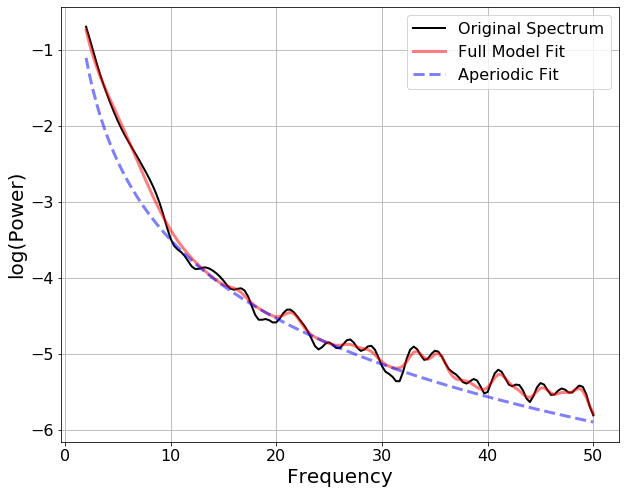

In [63]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12], peak_threshold=1)
fooof.add_data(freqs, psd, freq_range=[2, 50])
fooof.fit()
fooof.report()

#### 1 - lower threshold resulted in mor "small" oscillations being overfitted
-------
#### ii

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.5849, 3.8505                                          
                                                                                                  
                                       4 peaks were found:                                        
          

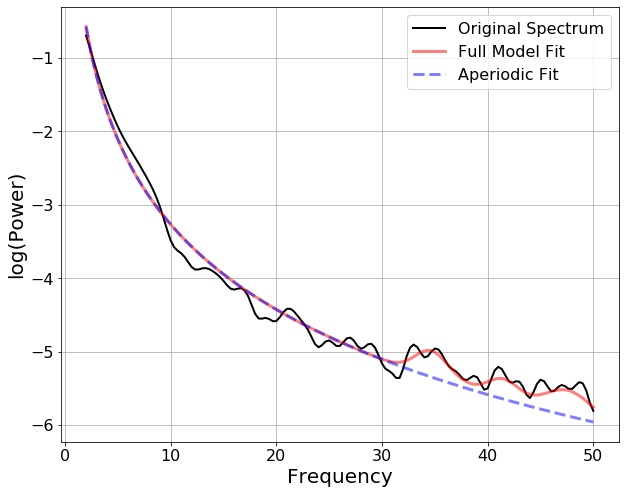

In [64]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[3, 12])
fooof.add_data(freqs, psd, freq_range=[2, 50])
fooof.fit()
fooof.report()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.5848, 3.8510                                          
                                                                                                  
                                       2 peaks were found:                                        
          

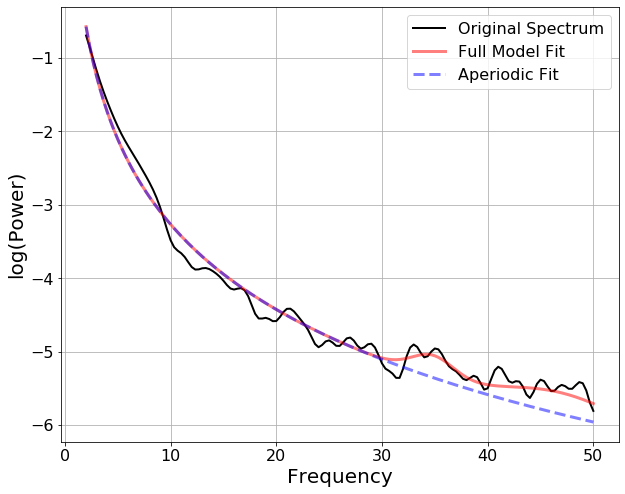

In [65]:
fooof: f.FOOOF = f.FOOOF(peak_width_limits=[4, 12])
fooof.add_data(freqs, psd, freq_range=[2, 50])
fooof.fit()
fooof.report()
#### as the width gets larger, so are the gaussians being fitted ar getting wider
#### (and fitting things that are more broadband than oscillations).

#### iii



min_peak_height=0
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.5775, 3.8498                                          
                                                                                                  
                                       8 peaks were found:                               

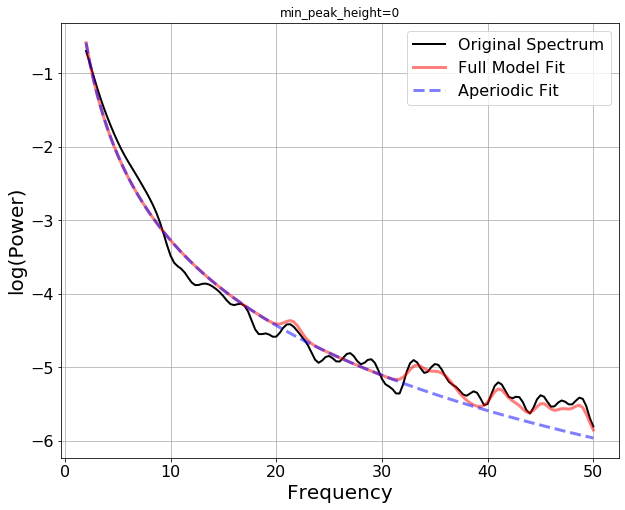

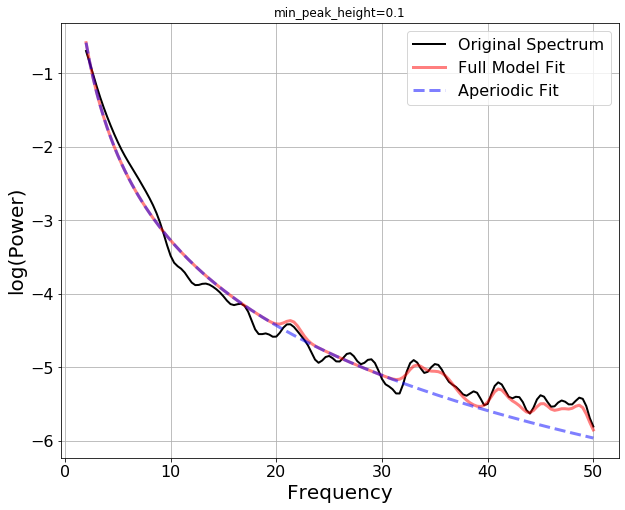

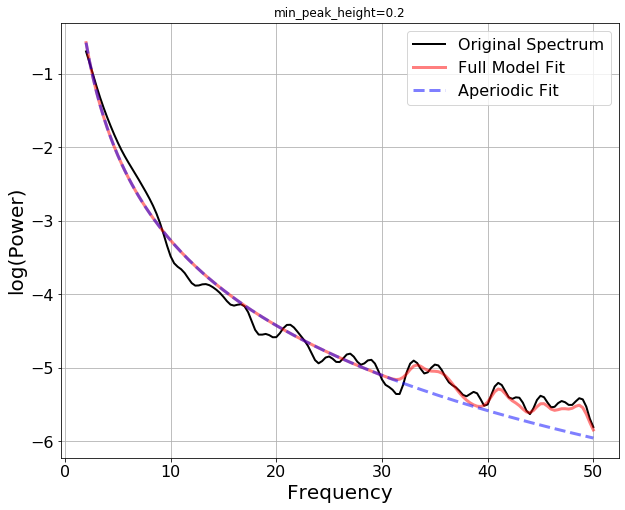

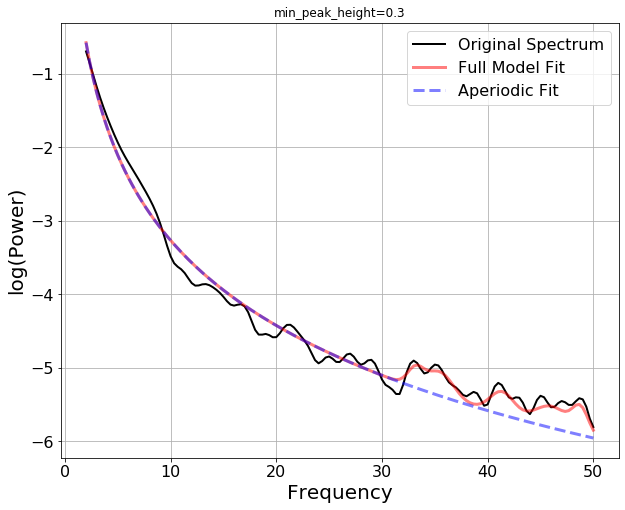

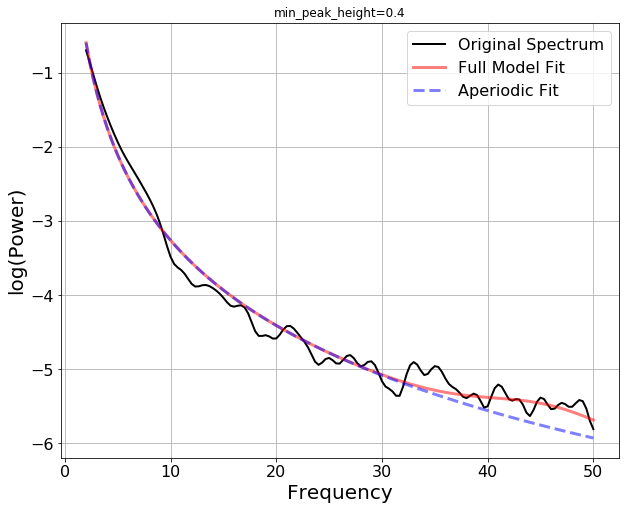

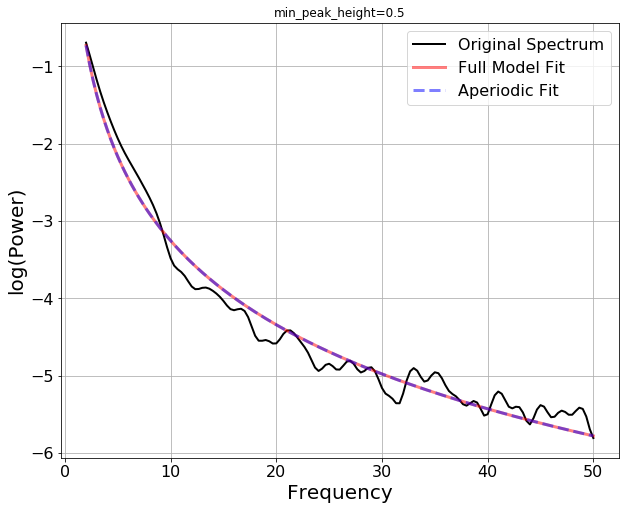

In [66]:
for i in [0, .1, .2, .3, .4, .5]:
    fooof: f.FOOOF = f.FOOOF(peak_width_limits=[1.5, 12], min_peak_height=i)
    fooof.add_data(freqs, psd, freq_range=[2, 50])
    fooof.fit()
    print (f"\n\nmin_peak_height={i}")
    fooof.report()
    plt.title(f"min_peak_height={i}")

#### Higher min peak height results in more gaussians being fitted. using 0.4 we get a gaussian with peak height of 0.3, but this is because the spectrum is being cut early.

